In [16]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
import  matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, classification_report
from tqdm import tqdm


In [2]:
def confusion_matrix_plot(data, title):
  
  
  threshold = 0.5
  y_pred_prob = list(data['predicted_label'])
 
  data['predicted_binary'] =  [1 if prob >= threshold else 0 for prob in y_pred_prob]
#  return data

  true_labels = data['True_Label']
  predicted_labels= data['predicted_binary']


  conf_matrix = confusion_matrix(true_labels, predicted_labels)
  class_labels = ['Not-Fraud', 'Fraud']

  # Create a heatmap using seaborn
  plt.figure(figsize=(6, 4))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='PuRd', xticklabels=class_labels, yticklabels=class_labels)

  # Add labels, title, and display the plot
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels')
  plt.title(f'{title} laundering')
  plt.savefig(f'auth_data/{title}.png')
  plt.show()
  # Calculate precision, recall, and F1-score
  precision = precision_score(true_labels, predicted_labels, average='binary')
  recall = recall_score(true_labels, predicted_labels, average='binary')
  f1 = f1_score(true_labels, predicted_labels, average='binary')

  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1-Score: {f1:.2f}")

  # Alternatively, print a full classification report
  print("\nClassification Report:")
  report = classification_report(true_labels, predicted_labels, target_names=class_labels, output_dict=True)
  df = pd.DataFrame(report).transpose()
  print(df)
  print(classification_report(true_labels, predicted_labels, target_names=class_labels))
  


def patterns_transactions(data,patterns, bank,is_bank =True):
  
    if is_bank:
        data = data[(data['From Bank']==bank) | (data['To Bank']==bank)]
    
    # Select only the relevant columns from patterns_HI
  #  patterns_reduced = patterns#[['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Laundering Type','Is Laundering']]

    # Merge the DataFrames
    merged_df = data.merge(
        patterns,  #
        how='left',  # Use 'left' to keep all rows from the first DataFrame
        left_on=['Timestamp_x','From Bank','To Bank', 'Account','Account.1','Amount Paid','Amount Received_x'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering_x'],  # Keys for the first DataFrame
        right_on=['Timestamp','From Bank','To Bank','Account','Account.1','Amount Paid','Amount Received'],#[ 'From Bank', 'Account', 'To Bank', 'Account.1','Is Laundering']  # Keys for the second DataFrame
    )

    threshold = 0.5
    patterns = merged_df.drop(columns=['Timestamp', 'From Bank', 'Account', 'To Bank', 'Account.1', 'Is Laundering'])

    y_pred_prob = list(patterns['predicted_label'])
 
    patterns['predicted_binary'] =  [1 if prob >= threshold else 0 for prob in y_pred_prob]

    patterns = patterns[patterns['Laundering Type'].notna()]
    patterns = patterns[['True_Label','predicted_binary','Laundering Type']]

    patterns['Correct'] = [1 if row['True_Label']==row['predicted_binary'] else 0 for i,row in patterns.iterrows()]
    patterns['False'] = [1 if row['True_Label']!=row['predicted_binary'] else 0 for i,row in patterns.iterrows()]

    patterns = patterns.groupby('Laundering Type')[['Correct', 'False']].sum()
    patterns['Correct'] = patterns['Correct']/(patterns['Correct']+patterns['False'])
    patterns['False'] = 1-patterns['Correct']
   # f, ax = plt.subplots(figsize=(6, 6))
   # sns.heatmap(patterns,annot=True, ax=ax)
    
  

    return patterns

In [3]:
patterns_HI = pd.read_csv('patterns/HI-Large_patterns.csv')
patterns_LI  = pd.read_csv('patterns/LI-Large_patterns.csv')

In [ ]:
BF_AF_HI = pd.read_csv('auth_data/LI_BFGT_FraudGT_allpredictions.csv')
BF_AF_LI = pd.read_csv('auth_data/LI_BFGT_FraudGT_allpredictions.csv')

BF_AG_HI = pd.read_csv('auth_data/HI_BFGT_GCN_allpredictions.csv')
BF_AG_LI = pd.read_csv('auth_data/LI_BFGT_GCN_allpredictions.csv')

BG_AG_HI = pd.read_csv('auth_data/HI_BGCN_GCN_allpredictions.csv')
BG_AG_LI = pd.read_csv('auth_data/LI_BGCN_GCN_allpredictions.csv')

BG_AF_HI = pd.read_csv('auth_data/HI_BGCN_FraudGT_allpredictions.csv')
BG_AF_LI = pd.read_csv('auth_data/LI_BGCN_FraudGT_allpredictions.csv')

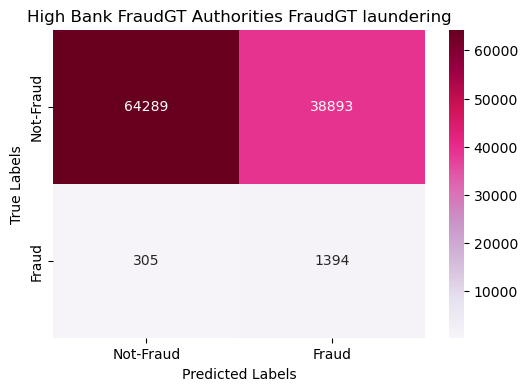

Precision: 0.03
Recall: 0.82
F1-Score: 0.07

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.995278  0.623064  0.766367  103182.000000
Fraud          0.034602  0.820483  0.066403    1699.000000
accuracy       0.626262  0.626262  0.626262       0.626262
macro avg      0.514940  0.721773  0.416385  104881.000000
weighted avg   0.979716  0.626262  0.755028  104881.000000
              precision    recall  f1-score   support

   Not-Fraud       1.00      0.62      0.77    103182
       Fraud       0.03      0.82      0.07      1699

    accuracy                           0.63    104881
   macro avg       0.51      0.72      0.42    104881
weighted avg       0.98      0.63      0.76    104881



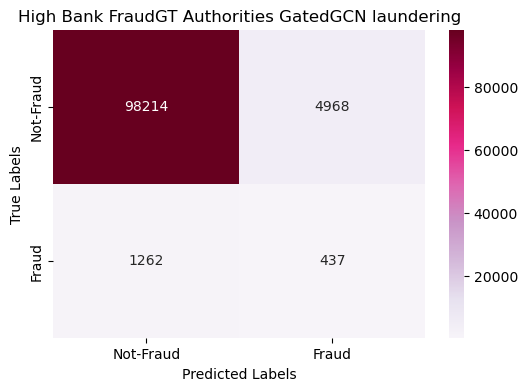

Precision: 0.08
Recall: 0.26
F1-Score: 0.12

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.987314  0.951852  0.969259  103182.000000
Fraud          0.080851  0.257210  0.123029    1699.000000
accuracy       0.940599  0.940599  0.940599       0.940599
macro avg      0.534082  0.604531  0.546144  104881.000000
weighted avg   0.972629  0.940599  0.955550  104881.000000
              precision    recall  f1-score   support

   Not-Fraud       0.99      0.95      0.97    103182
       Fraud       0.08      0.26      0.12      1699

    accuracy                           0.94    104881
   macro avg       0.53      0.60      0.55    104881
weighted avg       0.97      0.94      0.96    104881



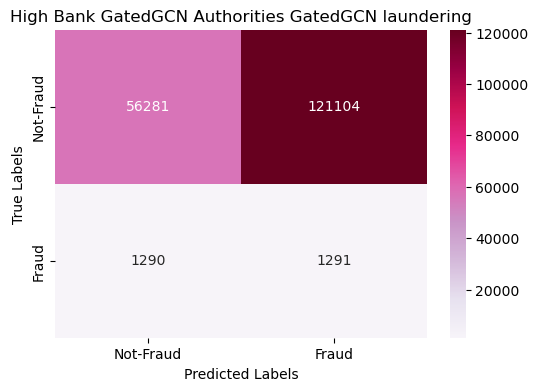

Precision: 0.01
Recall: 0.50
F1-Score: 0.02

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.977593  0.317282  0.479077  177385.000000
Fraud          0.010548  0.500194  0.020660    2581.000000
accuracy       0.319905  0.319905  0.319905       0.319905
macro avg      0.494070  0.408738  0.249868  179966.000000
weighted avg   0.963724  0.319905  0.472503  179966.000000
              precision    recall  f1-score   support

   Not-Fraud       0.98      0.32      0.48    177385
       Fraud       0.01      0.50      0.02      2581

    accuracy                           0.32    179966
   macro avg       0.49      0.41      0.25    179966
weighted avg       0.96      0.32      0.47    179966



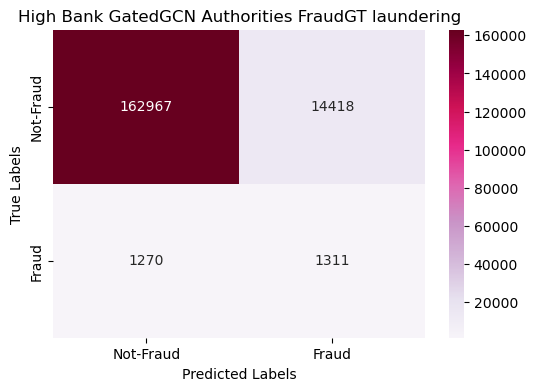

Precision: 0.08
Recall: 0.51
F1-Score: 0.14

Classification Report:
              precision    recall  f1-score        support
Not-Fraud      0.992267  0.918719  0.954078  177385.000000
Fraud          0.083349  0.507943  0.143200    2581.000000
accuracy       0.912828  0.912828  0.912828       0.912828
macro avg      0.537808  0.713331  0.548639  179966.000000
weighted avg   0.979232  0.912828  0.942449  179966.000000
              precision    recall  f1-score   support

   Not-Fraud       0.99      0.92      0.95    177385
       Fraud       0.08      0.51      0.14      2581

    accuracy                           0.91    179966
   macro avg       0.54      0.71      0.55    179966
weighted avg       0.98      0.91      0.94    179966



In [65]:
confusion_matrix_plot(BF_AF_HI,title='High Bank FraudGT Authorities FraudGT')

# confusion_matrix_plot(BF_AF_LI,title='Low Bank FraudGT Authorities FraudGT')

confusion_matrix_plot(BF_AG_HI,title='High Bank FraudGT Authorities GatedGCN')

# confusion_matrix_plot(BF_AG_LI,title='Low Bank FraudGT Authorities GatedGCN')

confusion_matrix_plot(BG_AG_HI,title='High Bank GatedGCN Authorities GatedGCN')

# confusion_matrix_plot(BG_AG_LI,title='Low Bank GatedGCN Authorities GatedGCN')

confusion_matrix_plot(BG_AF_HI,title='High Bank GatedGCN Authorities FraudGT')

# confusion_matrix_plot(BG_AF_LI,title='Low Bank GatedGCN Authorities FraudGT')

In [20]:
all_banks_HI_formatted = pd.read_csv('all_bank_data/formatted_transactions_HI.csv')
all_banks_HI_original = pd.read_csv('all_bank_data/HI-Large_Transactions.csv')

In [22]:
all_banks_HI = pd.read_csv('all_bank_data/HI_all_transactions.csv')

MemoryError: Unable to allocate 404. MiB for an array with shape (6, 8815749) and data type object

In [5]:
HI_BFGT_FraudGT = pd.read_csv('auth_data/HI_BFGT_FraudGT.csv').rename(columns={'Unnamed: 0':'Label'})
HI_BFGT_GCN =  pd.read_csv('auth_data/HI_BFGT_GCN.csv').rename(columns={'Unnamed: 0':'Label'})
HI_BGCN_FraudGT = pd.read_csv('auth_data/HI_BGCN_FraudGT.csv').rename(columns={'Unnamed: 0':'Label'})
HI_BGCN_GCN = pd.read_csv('auth_data/HI_BGCN_GCN.csv').rename(columns={'Unnamed: 0':'Label'})


LI_BFGT_FraudGT = pd.read_csv('auth_data/LI_BFGT_FraudGT.csv').rename(columns={'Unnamed: 0':'Label'})
LI_BFGT_GCN =  pd.read_csv('auth_data/LI_BFGT_GCN.csv').rename(columns={'Unnamed: 0':'Label'})
LI_BGCN_FraudGT = pd.read_csv('auth_data/LI_BGCN_FraudGT.csv').rename(columns={'Unnamed: 0':'Label'})
LI_BGCN_GCN = pd.read_csv('auth_data/LI_BGCN_GCN.csv').rename(columns={'Unnamed: 0':'Label'})

In [11]:
import numpy as np

In [17]:
def class_report(predictions):
    # TP = predictions[predictions['Label']=='predicted fraud']['Fraud'].iloc[0]
    # FN = predictions[predictions['Label']=='not received']['Fraud'].iloc[0] + predictions[predictions['Label']=='predicted not-fraud']['Fraud'].iloc[0]
    # TN = predictions[predictions['Label']=='not received']['Not-Fraud'].iloc[0] 
    # FP = predictions[predictions['Label']=='predicted fraud']['Not-Fraud'].iloc[0] + predictions[predictions['Label']=='predicted not-fraud']['Not-Fraud'].iloc[0]


    # y_true = np.concatenate([
    #     np.full(TP, 1),
    #     np.full(FN, 1),
    #     np.full(FP, 0),
    #     np.full(TN, 0)
    # ])
    # y_pred = np.concatenate([
    #     np.full(TP, 1),      # correctly predicted fraud
    #     np.full(FN, 0),      # frauds missed (not predicted as fraud)
    #     np.full(FP, 1),      # not-fraud predicted as fraud
    #     np.full(TN, 0)       # correctly predicted not-fraud
    # ])

    TP = predictions[predictions['Label']=='predicted fraud']['Fraud'].iloc[0]
    FN = predictions[predictions['Label']=='not received']['Fraud'].iloc[0] + predictions[predictions['Label']=='predicted not-fraud']['Fraud'].iloc[0]
    TN = predictions[predictions['Label']=='not received']['Not-Fraud'].iloc[0] + predictions[predictions['Label']=='predicted not-fraud']['Not-Fraud'].iloc[0]
    FP = predictions[predictions['Label']=='predicted fraud']['Not-Fraud'].iloc[0]


    y_true = np.concatenate([
        np.full(TP, 1),
        np.full(FN, 1),
        np.full(FP, 0),
        np.full(TN, 0)
    ])
    y_pred = np.concatenate([
        np.full(TP, 1),      # correctly predicted fraud
        np.full(FN, 0),      # frauds missed (not predicted as fraud)
        np.full(FP, 1),      # not-fraud predicted as fraud
        np.full(TN, 0)       # correctly predicted not-fraud
    ])



    # Generate the classification report
    print(classification_report(y_true, y_pred, target_names=["Not-Fraud", "Fraud"],digits=4))

In [18]:

print('High Bank FraudGT Auth FraudGT')
class_report(HI_BFGT_FraudGT)

print('High Bank FraudGT Auth GCN')
class_report(HI_BFGT_GCN)


print('High Bank GCN Auth GCN')
class_report(HI_BGCN_GCN)

print('High Bank GCN Auth FraudGT')
class_report(HI_BGCN_FraudGT)

High Bank FraudGT Auth FraudGT
              precision    recall  f1-score   support

   Not-Fraud     0.9980    0.9999    0.9990  23118629
       Fraud     0.7511    0.0741    0.1349     50893

    accuracy                         0.9979  23169522
   macro avg     0.8745    0.5370    0.5669  23169522
weighted avg     0.9974    0.9979    0.9971  23169522

High Bank FraudGT Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9983    0.9998    0.9991  23118629
       Fraud     0.7467    0.2363    0.3590     50893

    accuracy                         0.9981  23169522
   macro avg     0.8725    0.6181    0.6790  23169522
weighted avg     0.9978    0.9981    0.9977  23169522

High Bank GCN Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9985    0.9997    0.9991  23077462
       Fraud     0.6405    0.2385    0.3476     45282

    accuracy                         0.9982  23122744
   macro avg     0.8195    0.6191    0.6734  23

In [19]:

print('High Bank FraudGT Auth FraudGT')
class_report(HI_BFGT_FraudGT)

print('High Bank FraudGT Auth GCN')
class_report(HI_BFGT_GCN)


print('High Bank GCN Auth GCN')
class_report(HI_BGCN_GCN)

print('High Bank GCN Auth FraudGT')
class_report(HI_BGCN_FraudGT)

High Bank FraudGT Auth FraudGT
              precision    recall  f1-score   support

   Not-Fraud     0.9980    0.9999    0.9990  23118629
       Fraud     0.7511    0.0741    0.1349     50893

    accuracy                         0.9979  23169522
   macro avg     0.8745    0.5370    0.5669  23169522
weighted avg     0.9974    0.9979    0.9971  23169522

High Bank FraudGT Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9983    0.9998    0.9991  23118629
       Fraud     0.7467    0.2363    0.3590     50893

    accuracy                         0.9981  23169522
   macro avg     0.8725    0.6181    0.6790  23169522
weighted avg     0.9978    0.9981    0.9977  23169522

High Bank GCN Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9985    0.9997    0.9991  23077462
       Fraud     0.6405    0.2385    0.3476     45282

    accuracy                         0.9982  23122744
   macro avg     0.8195    0.6191    0.6734  23

In [20]:
print('Low Bank FraudGT Auth FraudGT')
class_report(LI_BFGT_FraudGT)

print('Low Bank FraudGT Auth GCN')
class_report(LI_BFGT_GCN)


print('Low Bank GCN Auth GCN')
class_report(LI_BGCN_GCN)

print('Low Bank GCN Auth FraudGT')
class_report(LI_BGCN_FraudGT)

Low Bank FraudGT Auth FraudGT
              precision    recall  f1-score   support

   Not-Fraud     0.9988    0.9995    0.9992  22391869
       Fraud     0.0072    0.0028    0.0041     27405

    accuracy                         0.9983  22419274
   macro avg     0.5030    0.5012    0.5016  22419274
weighted avg     0.9976    0.9983    0.9979  22419274

Low Bank FraudGT Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9988    1.0000    0.9994  22391869
       Fraud     0.5202    0.0292    0.0552     27405

    accuracy                         0.9988  22419274
   macro avg     0.7595    0.5146    0.5273  22419274
weighted avg     0.9982    0.9988    0.9982  22419274

Low Bank GCN Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9988    1.0000    0.9994  22393213
       Fraud     0.4968    0.0311    0.0585     27087

    accuracy                         0.9988  22420300
   macro avg     0.7478    0.5155    0.5290  22420

In [21]:
print('Low Bank FraudGT Auth FraudGT')
class_report(LI_BFGT_FraudGT)

print('Low Bank FraudGT Auth GCN')
class_report(LI_BFGT_GCN)


print('Low Bank GCN Auth GCN')
class_report(LI_BGCN_GCN)

print('Low Bank GCN Auth FraudGT')
class_report(LI_BGCN_FraudGT)

Low Bank FraudGT Auth FraudGT
              precision    recall  f1-score   support

   Not-Fraud     0.9988    0.9995    0.9992  22391869
       Fraud     0.0072    0.0028    0.0041     27405

    accuracy                         0.9983  22419274
   macro avg     0.5030    0.5012    0.5016  22419274
weighted avg     0.9976    0.9983    0.9979  22419274

Low Bank FraudGT Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9988    1.0000    0.9994  22391869
       Fraud     0.5202    0.0292    0.0552     27405

    accuracy                         0.9988  22419274
   macro avg     0.7595    0.5146    0.5273  22419274
weighted avg     0.9982    0.9988    0.9982  22419274

Low Bank GCN Auth GCN
              precision    recall  f1-score   support

   Not-Fraud     0.9988    1.0000    0.9994  22393213
       Fraud     0.4968    0.0311    0.0585     27087

    accuracy                         0.9988  22420300
   macro avg     0.7478    0.5155    0.5290  22420

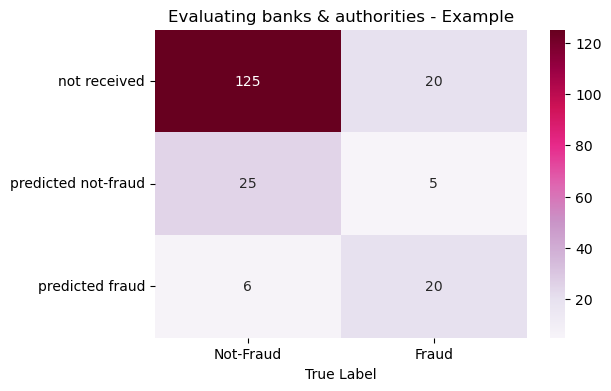

In [6]:
data = {
    "Label": ["not received","predicted not-fraud" , "predicted fraud"],
    "Not-Fraud": [125, 25, 6],
    "Fraud": [20, 5 , 20]
}

df = pd.DataFrame(data)

table = df.copy()

table.set_index("Label", inplace=True)


plt.figure(figsize=(6, 4))
sns.heatmap(table, annot=True, fmt=",.0f", cmap='PuRd')#, xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.title(f'Evaluating banks & authorities - Example')#, pad=10)
plt.xlabel('True Label')
plt.ylabel('')
#plt.savefig(f'outputs/{model_name}.png',bbox_inches = "tight")
plt.show()


In [36]:
class_report(df)

              precision    recall  f1-score   support

   Not-Fraud       0.86      0.97      0.91       155
       Fraud       0.80      0.44      0.57        45

    accuracy                           0.85       200
   macro avg       0.83      0.71      0.74       200
weighted avg       0.84      0.85      0.83       200



In [1]:
import pandas as pd

In [13]:
HI_BFGT_FraudGT_pat = pd.read_csv('auth_data/HI_BFGT_FraudGT_patterns.csv')
HI_BFGT_FraudGT_pat['model'] = 'HI BFGT AFGT'

LI_BFGT_FraudGT_pat = pd.read_csv('auth_data/LI_BFGT_FraudGT_patterns.csv')
LI_BFGT_FraudGT_pat['model'] = 'LI BFGT AFGT'

HI_BFGT_GCN_pat = pd.read_csv('auth_data/HI_BFGT_GCN_patterns.csv')
HI_BFGT_GCN_pat['model'] = 'HI BFGT AGCN'

LI_BFGT_GCN_pat = pd.read_csv('auth_data/LI_BFGT_GCN_patterns.csv')
LI_BFGT_GCN_pat['model'] = 'LI BFGT AGCN'

HI_BGCN_GCN_pat = pd.read_csv('auth_data/HI_BGCN_GCN_patterns.csv')
HI_BGCN_GCN_pat['model'] = 'HI BGCN AGCN'

LI_BGCN_GCN_pat = pd.read_csv('auth_data/LI_BGCN_GCN_patterns.csv')
LI_BGCN_GCN_pat['model'] = 'LI BGCN AGCN'

HI_BGCN_FraudGT_pat = pd.read_csv('auth_data/HI_BGCN_FraudGT_patterns.csv')
HI_BGCN_FraudGT_pat['model'] = 'HI BGCN AFGT'

LI_BGCN_FraudGT_pat = pd.read_csv('auth_data/LI_BGCN_FraudGT_patterns.csv')
LI_BGCN_FraudGT_pat['model'] = 'LI BGCN AFGT'


patterns_list_HI = [HI_BFGT_FraudGT_pat,HI_BFGT_GCN_pat,HI_BGCN_GCN_pat,HI_BGCN_FraudGT_pat]
patterns_list_LI = [LI_BFGT_FraudGT_pat,LI_BFGT_GCN_pat,LI_BGCN_GCN_pat,LI_BGCN_FraudGT_pat]

In [2]:
HI_BFGT_FraudGT_pat = pd.read_csv('auth_data/HI_BFGT_FraudGT_patterns_n.csv')
HI_BFGT_FraudGT_pat['model'] = 'HI BFGT AFGT'

LI_BFGT_FraudGT_pat = pd.read_csv('auth_data/LI_BFGT_FraudGT_patterns_n.csv')
LI_BFGT_FraudGT_pat['model'] = 'LI BFGT AFGT'

HI_BFGT_GCN_pat = pd.read_csv('auth_data/HI_BFGT_GCN_patterns_n.csv')
HI_BFGT_GCN_pat['model'] = 'HI BFGT AGCN'

LI_BFGT_GCN_pat = pd.read_csv('auth_data/LI_BFGT_GCN_patterns_n.csv')
LI_BFGT_GCN_pat['model'] = 'LI BFGT AGCN'

HI_BGCN_GCN_pat = pd.read_csv('auth_data/HI_BGCN_GCN_patterns_n.csv')
HI_BGCN_GCN_pat['model'] = 'HI BGCN AGCN'

LI_BGCN_GCN_pat = pd.read_csv('auth_data/LI_BGCN_GCN_patterns_n.csv')
LI_BGCN_GCN_pat['model'] = 'LI BGCN AGCN'

HI_BGCN_FraudGT_pat = pd.read_csv('auth_data/HI_BGCN_FraudGT_patterns_n.csv')
HI_BGCN_FraudGT_pat['model'] = 'HI BGCN AFGT'

LI_BGCN_FraudGT_pat = pd.read_csv('auth_data/LI_BGCN_FraudGT_patterns_n.csv')
LI_BGCN_FraudGT_pat['model'] = 'LI BGCN AFGT'


patterns_list_HI = [HI_BFGT_FraudGT_pat,HI_BFGT_GCN_pat,HI_BGCN_GCN_pat,HI_BGCN_FraudGT_pat]
patterns_list_LI = [LI_BFGT_FraudGT_pat,LI_BFGT_GCN_pat,LI_BGCN_GCN_pat,LI_BGCN_FraudGT_pat]

In [4]:
correct_patterns = pd.DataFrame(columns=['Laundering Type', 'Correct_percent', 'model'])

for pattern in patterns_list_HI:
    pattern['Correct_percent']=round(pattern['Correct_percent']*100, 1)
    pattern = pattern.reset_index()
    pattern['Count'] =  (
            pattern['Correct'].astype(int).astype(str) + "/" +
            (pattern['Correct'] + pattern['False']).astype(int).astype(str)
        )

    pattern = pattern[['Laundering Type', 'Correct_percent', 'model','Count']]
    correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)


correct_patterns['Combined'] = (
    correct_patterns['Correct_percent'].astype(str) + "% (" +
    correct_patterns['Count'] + ")"
)

data_pivoted = correct_patterns.pivot(index="Laundering Type", columns="model", values="Combined")
data_pivoted


C:\Users\adagi\AppData\Local\Temp\ipykernel_13032\2222187133.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  correct_patterns = pd.concat([correct_patterns, pattern], ignore_index=True)


model,HI BFGT AFGT,HI BFGT AGCN,HI BGCN AFGT,HI BGCN AGCN
Laundering Type,,,,
BIPARTITE,25.0% (46/184),94.0% (173/184),100.0% (27/27),100.0% (12/12)
CYCLE,39.1% (75/192),92.2% (177/192),100.0% (44/44),100.0% (23/23)
FAN-IN,55.9% (81/145),93.8% (136/145),100.0% (33/33),100.0% (9/9)
FAN-OUT,19.2% (49/255),95.3% (243/255),100.0% (54/54),100.0% (31/31)
GATHER-SCATTER,53.4% (453/849),90.6% (769/849),99.3% (148/149),97.2% (69/71)
RANDOM,36.6% (59/161),94.4% (152/161),100.0% (38/38),100.0% (18/18)
SCATTER-GATHER,56.9% (226/397),91.4% (363/397),98.9% (93/94),100.0% (50/50)
STACK,36.0% (170/472),93.0% (439/472),98.9% (94/95),100.0% (43/43)


In [6]:
LI_BGCN_FraudGT_pat

,Laundering Type,Correct,False,Correct_percent,False_percent,model


In [3]:
patterns = pd.read_csv('auth_data/test_of_patterns.csv')

In [5]:
patterns['True_Label']

0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1401    NaN
1402    NaN
1403    NaN
1404    NaN
1405    NaN
Name: True_Label, Length: 1406, dtype: float64